In [1]:
from load_prep_sample import prep_sample

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from kerastuner import RandomSearch
from sklearn.metrics import confusion_matrix, classification_report
from keras.layers import Conv2D

from VGG16BP import build_model_VGG16BP

2024-04-26 11:08:50.590592: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-26 11:08:50.871719: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-26 11:08:51.849116: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/tmp/ipykernel_27529/3586776484.py:8: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [2]:
X_train, X_test, y_train, y_test = prep_sample (nb = 900,
                                                size = 224,
                                                expo = True,
                                                norm = True,
                                                canal = 3, 
                                                test_size = 0.25,
                                                random_state = 48)

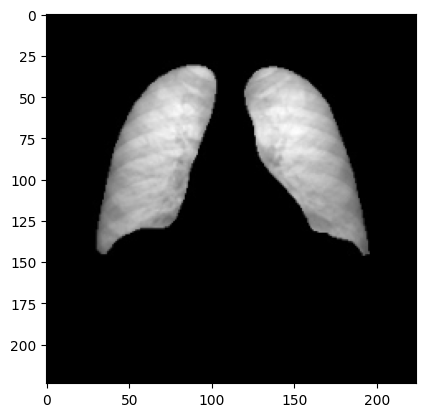

In [3]:
plt.imshow(X_test[0])

In [11]:

new_model = build_model_VGG16BP()

In [12]:
history = new_model.fit(X_train, 
                        y_train, 
                        epochs=30, 
                        batch_size= 64,
                        validation_data=(X_test, y_test))

Epoch 1/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 15s 272ms/step - accuracy: 0.4818 - loss: 1.1215 - val_accuracy: 0.7722 - val_loss: 0.5515
Epoch 2/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 194ms/step - accuracy: 0.7505 - loss: 0.5994 - val_accuracy: 0.7989 - val_loss: 0.5148
Epoch 3/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 194ms/step - accuracy: 0.8006 - loss: 0.5257 - val_accuracy: 0.8156 - val_loss: 0.4545
Epoch 4/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 193ms/step - accuracy: 0.8326 - loss: 0.4341 - val_accuracy: 0.8433 - val_loss: 0.3787
Epoch 5/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 193ms/step - accuracy: 0.8580 - loss: 0.3775 - val_accuracy: 0.8500 - val_loss: 0.3715
Epoch 6/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 193ms/step - accuracy: 0.8651 - loss: 0.3295 - val_accuracy: 0.8411 - val_loss: 0.3969
Epoch 7/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 194ms/step - accuracy: 0.8852 - loss: 0.3120 - val_accuracy: 0.8622 - val_loss: 0.3307
Epoch 8/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 193ms/step - accuracy: 0.8954 - loss: 0.2673 - val_accuracy: 0

/tmp/ipykernel_27529/3058597897.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(history.history['accuracy'],'bo-', label='Train Accuracy',color='lightblue')
/tmp/ipykernel_27529/3058597897.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(history.history['val_accuracy'],'ro-', label='Validation Accuracy',color='salmon')


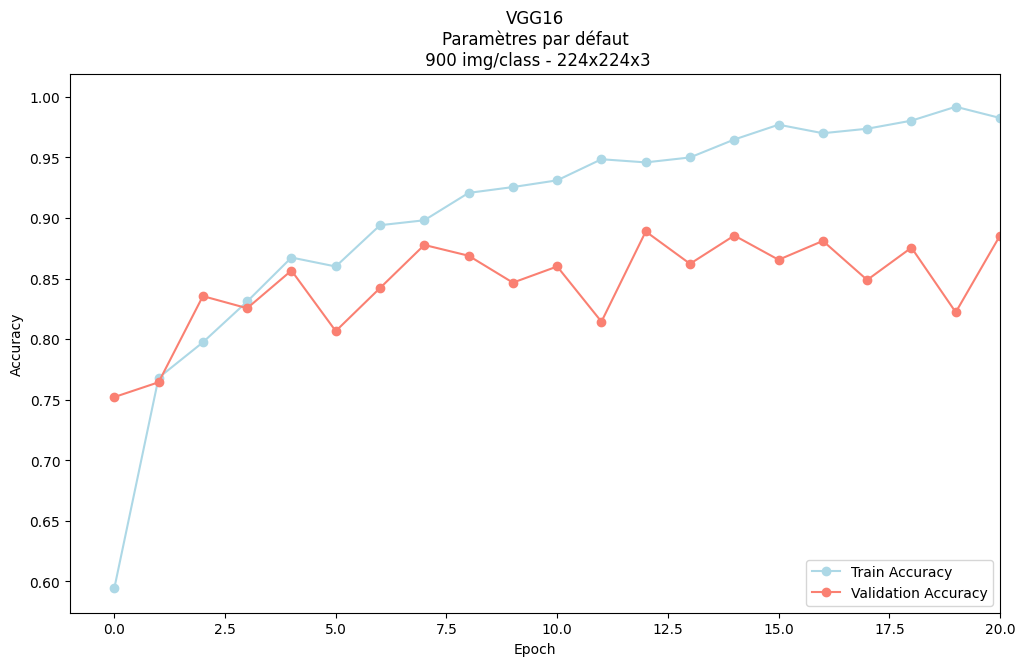

In [6]:
plt.figure(figsize=(12, 7))
plt.plot(history.history['accuracy'],'bo-', label='Train Accuracy',color='lightblue')
plt.plot(history.history['val_accuracy'],'ro-', label='Validation Accuracy',color='salmon')
plt.title('VGG16\nParamètres par défaut\n 900 img/class - 224x224x3')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xlim(-1,20)
plt.legend(loc='lower right')
plt.show()

In [7]:
# Prédiction sur l'ensemble de test
y_pred = new_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
#print("Matrice de confusion :")
#print(conf_matrix)

# Rapport de classification
report = classification_report(y_test_classes, y_pred_classes, target_names=['COVID', 'Lung', 'Normal', 'Viral'])
print(report)


29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step
              precision    recall  f1-score   support

       COVID       0.70      0.93      0.80       242
        Lung       0.88      0.68      0.76       216
      Normal       0.87      0.78      0.82       216
       Viral       0.99      0.96      0.98       226

    accuracy                           0.84       900
   macro avg       0.86      0.84      0.84       900
weighted avg       0.86      0.84      0.84       900



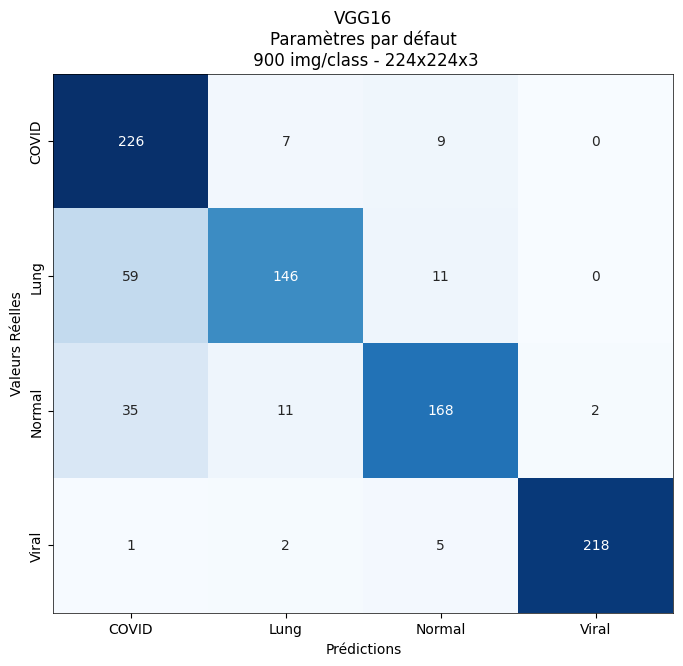

In [8]:
plt.figure(figsize=(8, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=['COVID', 'Lung', 'Normal', 'Viral'],
            yticklabels=['COVID', 'Lung', 'Normal', 'Viral'])
plt.title('VGG16\nParamètres par défaut\n 900 img/class - 224x224x3')
ax = plt.gca()
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(0.5)
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.show()

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


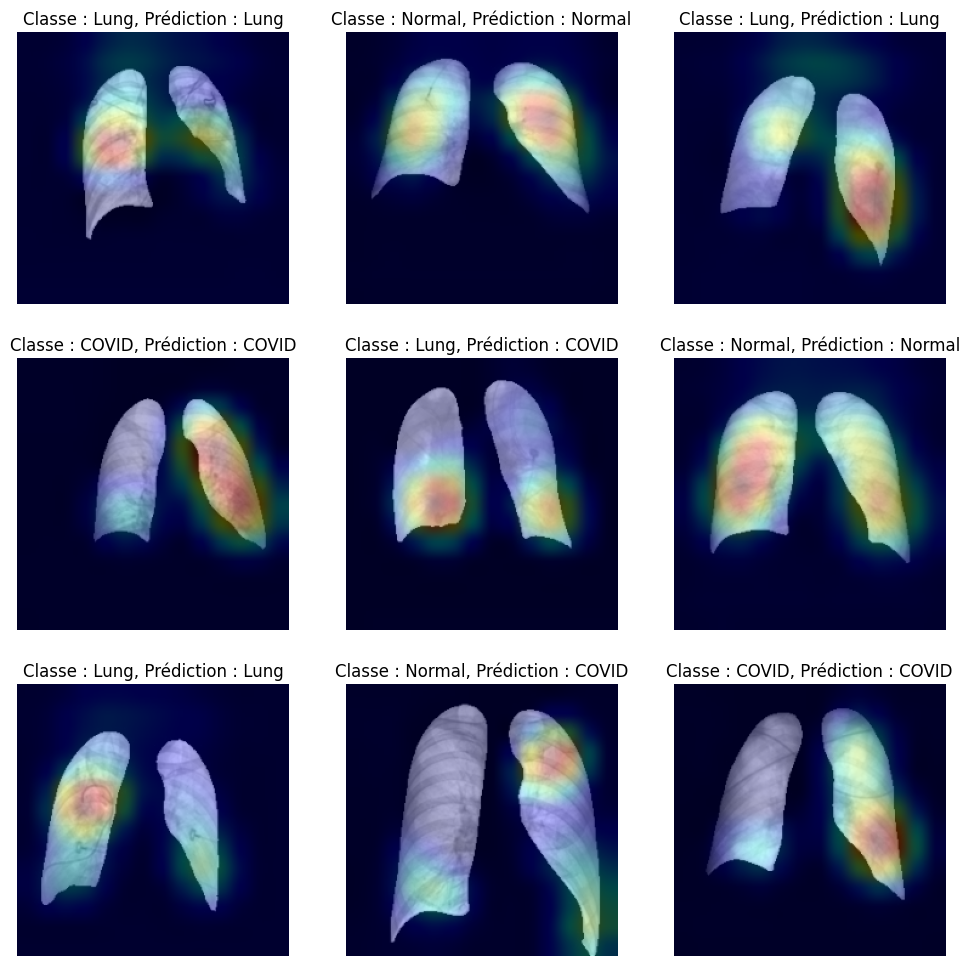

In [9]:
from grad_cam import make_gradcam_heatmap, save_and_display_gradcam
import matplotlib.pyplot as plt
import random
import numpy as np
from keras.layers import Conv2D
     
classes = ['COVID', 'Lung', 'Normal', 'Viral']

y_test_classes = np.argmax(y_test, axis=1)
y_pred = new_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Désactivation de l'activation softmax de la dernière couche
new_model.layers[-1].activation = None

# Identification du nom de la dernière couche Conv2D
last_conv_layer_name = None
for layer in reversed(new_model.layers):
    if isinstance(layer, Conv2D):
        last_conv_layer_name = layer.name
        break

# Préparation de la figure pour afficher 5 images
plt.figure(figsize=(12, 12))  # Largeur, hauteur en pouces
for i in range(9):
    R = random.randint(0, len(X_test) - 1)
    base_img = X_test[R]
    heatm_img = np.expand_dims(base_img, axis=0)
    img_cam = np.uint8(base_img * 255)  # Conversion de l'image pour affichage

    # Prédiction sans la couche softmax activée
    preds = new_model.predict(heatm_img)
    heatmap = make_gradcam_heatmap(heatm_img, new_model, last_conv_layer_name)
    grad_img = save_and_display_gradcam(img_cam, heatmap)

    # Vérification de la vraie classe et de la prédiction
    vraie = classes[y_test_classes[R]]
    prediction = classes[y_pred_classes[R]]

    # Affichage dans un sous-graphique
    plt.subplot(3, 3, i + 1)  # 1 ligne, 5 colonnes, ième position
    plt.imshow(grad_img)
    plt.title(f"Classe : {vraie}, Prédiction : {prediction}")
    plt.axis('off')  # Désactivation des axes pour une meilleure visibilité

plt.show()

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


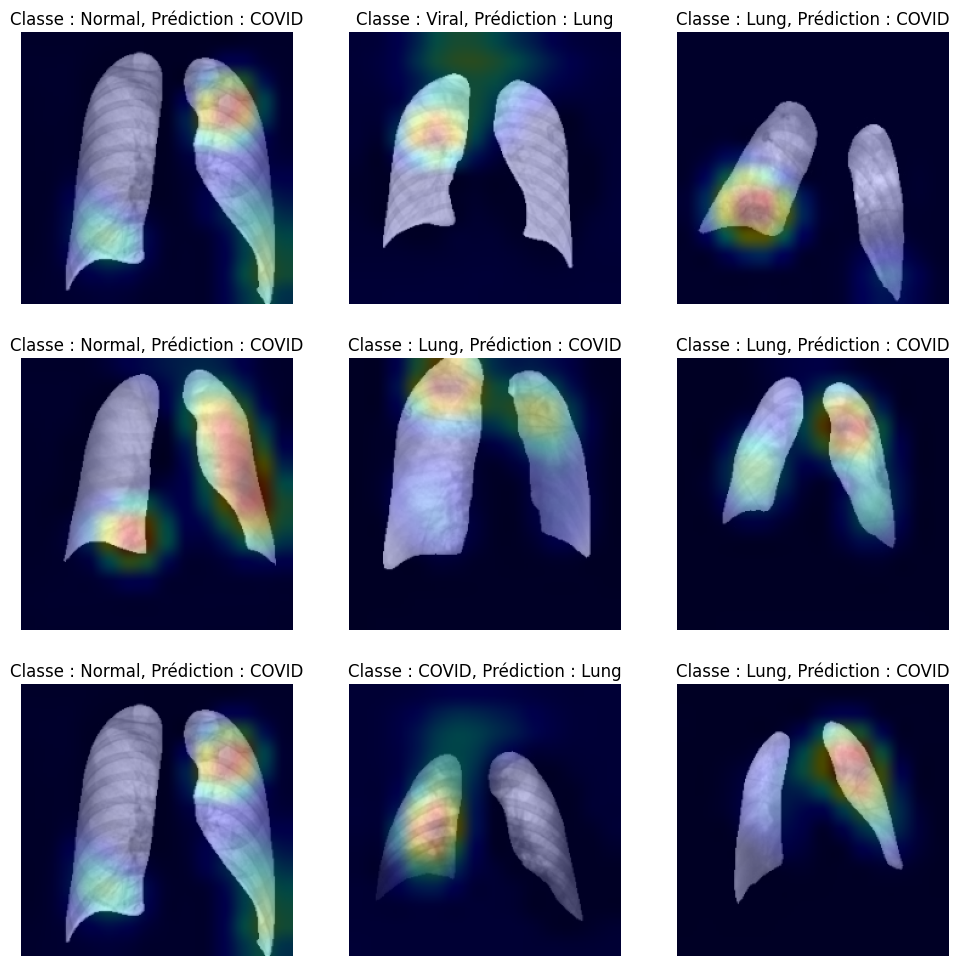

In [10]:
from grad_cam import make_gradcam_heatmap, save_and_display_gradcam
import matplotlib.pyplot as plt
import random
import numpy as np
from keras.layers import Conv2D

classes = ['COVID', 'Lung', 'Normal', 'Viral']

y_test_classes = np.argmax(y_test, axis=1)
y_pred = new_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

indices_diff = np.where(y_test_classes != y_pred_classes)[0]

# Désactivation de l'activation softmax de la dernière couche
new_model.layers[-1].activation = None

# Identification du nom de la dernière couche Conv2D
last_conv_layer_name = None
for layer in reversed(new_model.layers):
    if isinstance(layer, Conv2D):
        last_conv_layer_name = layer.name
        break

# Préparation de la figure pour afficher 5 images
plt.figure(figsize=(12, 12))  # Largeur, hauteur en pouces
for i in range(9):
    R = random.choice(indices_diff)
    base_img = X_test[R]
    heatm_img = np.expand_dims(base_img, axis=0)
    img_cam = np.uint8(base_img * 255)  # Conversion de l'image pour affichage

    # Prédiction sans la couche softmax activée
    preds = new_model.predict(heatm_img)
    heatmap = make_gradcam_heatmap(heatm_img, new_model, last_conv_layer_name)
    grad_img = save_and_display_gradcam(img_cam, heatmap)

    # Vérification de la vraie classe et de la prédiction
    vraie = classes[y_test_classes[R]]
    prediction = classes[y_pred_classes[R]]

    # Affichage dans un sous-graphique
    plt.subplot(3, 3, i + 1)  # 1 ligne, 5 colonnes, ième position
    plt.imshow(grad_img)
    plt.title(f"Classe : {vraie}, Prédiction : {prediction}")
    plt.axis('off')  # Désactivation des axes pour une meilleure visibilité

plt.show()